<a href="https://colab.research.google.com/github/phaneendar9182/EXPLORARY-DATA-ANALYSIS/blob/main/Artificial_Nueral_Network_for_classification_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow 
import sklearn

**Load the data**

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
print(df.shape)

(569, 31)


In [10]:
df['diagnosis'].unique()

array([0, 1])

**To make the dependent variable into numerical**

In [60]:
df['diagnosis']=df['diagnosis'].map({'M':0,"B":1}).astype(int)

In [59]:
df=df.drop(['id'],axis=1)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##splitting the data

In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size=0.33, random_state=42)

In [17]:
len(x_train),len(y_train)

(381, 381)

In [18]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.20320,0.10970,0.1966,0.07069,...,18.79,17.04,125.00,1102.0,0.15310,0.3583,0.5830,0.18270,0.3216,0.10100
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.1936,0.1838,0.05601,0.2488,0.08151
56,19.21,18.57,125.50,1152.0,0.10530,0.12670,0.13230,0.08994,0.1917,0.05961,...,26.14,28.14,170.10,2145.0,0.16240,0.3511,0.3879,0.20910,0.3537,0.08294
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.12760,0.2506,0.2028,0.10530,0.3035,0.07661
301,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,0.1781,0.06249,...,13.46,23.07,88.13,551.3,0.10500,0.2158,0.1904,0.07625,0.2685,0.07764


In [19]:
y_train

172    0
407    1
56     0
497    1
301    1
      ..
71     1
106    1
270    1
435    0
102    1
Name: diagnosis, Length: 381, dtype: int64

In [20]:
y_test

204    1
70     0
131    0
431    1
540    1
      ..
141    0
498    0
7      0
541    1
19     1
Name: diagnosis, Length: 188, dtype: int64

##importing the essential packages for the ANN Architecture

In [21]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.activations import sigmoid,relu,softmax,tanh

In [23]:
x.shape[1]

30

##Fitting to the model

In [26]:
model=Sequential()

In [27]:
##architecture 
##first hidden layer
model.add(Dense(units=128,kernel_initializer='he_uniform',activation='relu',input_dim=x.shape[1]))
##second hidden layer
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
##third hidden layer
model.add(Dense(units=32,kernel_initializer='he_uniform',activation='relu'))
##fourth hidden layer
model.add(Dense(units=16,kernel_initializer='he_uniform',activation='relu'))
##fifth hidden layer
model.add(Dense(units=8,kernel_initializer='he_uniform',activation='relu'))
##sixth hidden layer
model.add(Dense(units=4,kernel_initializer='he_uniform',activation='relu'))
##output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [29]:
model.fit(x_train,y_train,epochs=50,batch_size=10,validation_split=0.1)

Epoch 1/50
35/35 [==============================] - 6s 11ms/step - loss: 5.5519 - accuracy: 0.6082 - val_loss: 1.1950 - val_accuracy: 0.7179
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 1.3330 - accuracy: 0.6082 - val_loss: 0.6249 - val_accuracy: 0.7179
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 0.7612 - accuracy: 0.6111 - val_loss: 0.5370 - val_accuracy: 0.8718
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 0.6000 - accuracy: 0.8070 - val_loss: 0.4627 - val_accuracy: 0.8974
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.5171 - accuracy: 0.8509 - val_loss: 0.3783 - val_accuracy: 0.8974
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4819 - accuracy: 0.8596 - val_loss: 0.5232 - val_accuracy: 0.8205
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 0.4906 - accuracy: 0.8509 - val_loss: 0.3473 - val_accuracy: 0.8974
Epoch 8/50
35/35 [=

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                

In [31]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
model.history.history['loss']

[5.55189323425293,
 1.3329519033432007,
 0.7611638903617859,
 0.5999714136123657,
 0.51708984375,
 0.48185256123542786,
 0.4906325340270996,
 0.4658791720867157,
 0.5232131481170654,
 0.46783754229545593,
 0.4396803081035614,
 0.7002111077308655,
 0.4786545932292938,
 0.4294651746749878,
 0.41840773820877075,
 0.4142839312553406,
 0.41754668951034546,
 0.4412860572338104,
 0.42963355779647827,
 0.4391624629497528,
 0.4060824513435364,
 0.4299931526184082,
 0.4726058840751648,
 0.4292692542076111,
 0.41867154836654663,
 0.38238030672073364,
 0.37793415784835815,
 0.3920188546180725,
 0.41015762090682983,
 0.41860780119895935,
 0.37608954310417175,
 0.3668564558029175,
 0.45792925357818604,
 0.4182831645011902,
 0.39072713255882263,
 0.37473028898239136,
 0.36602863669395447,
 0.35973283648490906,
 0.4102930426597595,
 0.37049081921577454,
 0.3848778307437897,
 0.3542959988117218,
 0.38737380504608154,
 0.3606919050216675,
 0.37305212020874023,
 0.3673214316368103,
 0.3526080548763275,
 

In [33]:
model.history.history['accuracy']

[0.6081871390342712,
 0.6081871390342712,
 0.6111111044883728,
 0.8070175647735596,
 0.8508771657943726,
 0.859649121761322,
 0.8508771657943726,
 0.8538011908531189,
 0.8304093480110168,
 0.8508771657943726,
 0.8771929740905762,
 0.46198830008506775,
 0.8508771657943726,
 0.8947368264198303,
 0.9035087823867798,
 0.9035087823867798,
 0.8859649300575256,
 0.8801169395446777,
 0.8888888955116272,
 0.8771929740905762,
 0.8859649300575256,
 0.8888888955116272,
 0.8040935397148132,
 0.8742690086364746,
 0.8888888955116272,
 0.8976607918739319,
 0.8947368264198303,
 0.8947368264198303,
 0.8625730872154236,
 0.8918128609657288,
 0.8947368264198303,
 0.9005848169326782,
 0.8128654956817627,
 0.8918128609657288,
 0.8771929740905762,
 0.8888888955116272,
 0.8947368264198303,
 0.8918128609657288,
 0.8859649300575256,
 0.8888888955116272,
 0.8888888955116272,
 0.9064327478408813,
 0.8830409646034241,
 0.8947368264198303,
 0.9005848169326782,
 0.8830409646034241,
 0.9064327478408813,
 0.9005848169

In [34]:
model.history.history['val_accuracy']

[0.7179487347602844,
 0.7179487347602844,
 0.8717948794364929,
 0.8974359035491943,
 0.8974359035491943,
 0.8205128312110901,
 0.8974359035491943,
 0.8717948794364929,
 0.8974359035491943,
 0.8974359035491943,
 0.8974359035491943,
 0.8461538553237915,
 0.8974359035491943,
 0.8974359035491943,
 0.8717948794364929,
 0.8974359035491943,
 0.8461538553237915,
 0.9230769276618958,
 0.8974359035491943,
 0.8974359035491943,
 0.8974359035491943,
 0.8717948794364929,
 0.8974359035491943,
 0.8717948794364929,
 0.8974359035491943,
 0.8974359035491943,
 0.8974359035491943,
 0.8717948794364929,
 0.8974359035491943,
 0.8205128312110901,
 0.8717948794364929,
 0.8974359035491943,
 0.8974359035491943,
 0.8974359035491943,
 0.9230769276618958,
 0.8974359035491943,
 0.8717948794364929,
 0.8205128312110901,
 0.8974359035491943,
 0.8974359035491943,
 0.9230769276618958,
 0.8717948794364929,
 0.9230769276618958,
 0.8974359035491943,
 0.8461538553237915,
 0.8461538553237915,
 0.8717948794364929,
 0.8461538553

In [35]:
model.history.history['val_loss']

[1.1949735879898071,
 0.6248775720596313,
 0.5370190739631653,
 0.4627037048339844,
 0.3783269226551056,
 0.5232140421867371,
 0.34726643562316895,
 0.3863965570926666,
 0.34864935278892517,
 0.3443526029586792,
 0.3690546452999115,
 0.4134078919887543,
 0.34364554286003113,
 0.3460738956928253,
 0.3892401158809662,
 0.3449404537677765,
 0.42340293526649475,
 0.3510093688964844,
 0.3360500931739807,
 0.32158684730529785,
 0.3373948633670807,
 0.3644779324531555,
 0.3150717318058014,
 0.3670687973499298,
 0.31310510635375977,
 0.31848713755607605,
 0.31379783153533936,
 0.35204699635505676,
 0.3356320261955261,
 0.4077448844909668,
 0.3055286407470703,
 0.3006857633590698,
 0.3293468654155731,
 0.29726243019104004,
 0.29944369196891785,
 0.29393962025642395,
 0.33422523736953735,
 0.3920719027519226,
 0.2805095613002777,
 0.3262816071510315,
 0.3110927641391754,
 0.3712880313396454,
 0.28874894976615906,
 0.28277289867401123,
 0.46525484323501587,
 0.34594452381134033,
 0.34070181846618

##plotting the graph for the epochs with respect to the accuracy and loss and with the val_loss and val_accuracy

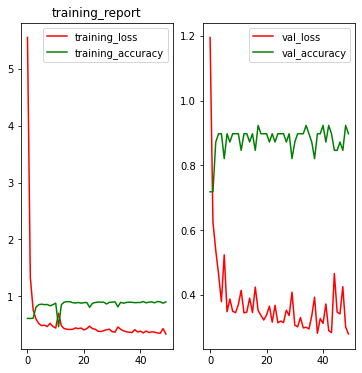

In [39]:
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("training_report")
plt.plot(np.arange(50),model.history.history['loss'],color='r',label='training_loss')
plt.plot(np.arange(50),model.history.history['accuracy'],color='g',label='training_accuracy')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(np.arange(50),model.history.history['val_loss'],color='r',label='val_loss')
plt.plot(np.arange(50),model.history.history['val_accuracy'],color='g',label='val_accuracy')
plt.legend(loc=0)
plt.show()


In [40]:
y_test_pred=model.predict(x_test)

6/6 [==============================] - 0s 6ms/step


In [42]:
y_test_pred[:5]

array([[0.44990644],
       [0.30909395],
       [0.30909395],
       [0.9831874 ],
       [0.96899635]], dtype=float32)

In [45]:
sol=[]
for i in y_test_pred:
  for j in i:
    if j > 0.5 :
      sol.append(1)
    else:
      sol.append(0)


In [46]:
print(sol[:5])

[0, 0, 0, 1, 1]


##checking the model performance

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [50]:
accuracy_score(y_test,sol)

0.9574468085106383

In [51]:
confusion_matrix(y_test,sol)

array([[ 62,   5],
       [  3, 118]])

In [52]:
print(classification_report(y_test,sol))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.96      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



##using the data and predicting the model and checking the model

In [54]:
c=[]
for i in x_test.iloc[0]:
  c.append(i)

In [57]:
result=model.predict([c])

1/1 [==============================] - 0s 132ms/step


In [58]:
for i in result:
  if i>0.5:
    print("m")
  else:
    print('B')

B
